# Análisis exploratorio de movies.csv

Este notebook va a servir como un análisis exploratorio de los datos de 20 millones de movie lens

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Importo el csv con los datos de las películas a analizar
movies = pd.read_csv('./data/movies.csv')

# Importo el csv con los datos de los ratings a analizar
ratings = pd.read_csv('./data/ratings.csv')

## **Dataset "movies"**
### **Entendiendo las variables**

Primero obtenemos un primer reconocimiento de la estructura del dataset movies en el que vamos a usar las siguientes funciones:
* movies.info():
    1. Muestra el número de filas que hay
    2. El número de columnas, sus nombres, cantidad de datos guardados, si contienen algún dato nulo y el tipo de dato que guarda la columna
* movies.head():
      Muestra las cinco primeras filas para enseñar una muestra de los datos del dataset

In [2]:
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Con nunique(axis=0) devolvemos el número de valores únicos que hay en cada columna.
* **movieId:** Vemos que el número coincide con el número total de datos que contiene esta columna obtenido anteriormente con movies.info() por lo que ningún id se repite y son todos únicos

* **title:** En este caso vemos que la proporción unique/total no es 100% o 1, entiendo que esto se debe a que hay unas pocas películas que comparten título, esto no tiene que suponer en principio ningún problema pero se tiene en cuenta

* **genres:** Para esta columna vemos que la proporcion unique/total es muy baja, se entiende que esto se debe a que hay un número limitado de géneros y el valor obtenido es el número de todas las combinaciones que hay en en el dataset, sería conveninete entonces sacar realmente los valores únicos de esta columna para saber tanto el número real como los diferentes géneros posibles que hay en este dataset

In [3]:
'''
REFERNECIA: 
'''
movies.nunique(axis=0)

movieId    27278
title      27262
genres      1342
dtype: int64

## **Dataset "ratings"**
### **Entendiendo las variables**

Primero obtenemos un primer reconocimiento de la estructura del dataset ratings en el que vamos a usar las siguientes funciones:
* ratings.info():
    1. Muestra el número de filas que hay
    2. El número de columnas, sus nombres, cantidad de datos guardados, si contienen algún dato nulo y el tipo de dato que guarda la columna
* ratings.head():
      Muestra las cinco primeras filas para enseñar una muestra de los datos del dataset

In [4]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


>__*Nota:*__ añadir una breve descripción de las columnas del dataset de ratings

### **Limpieza y reestructuración de datos**

Para este proceso vamos a parsear los datos a un mejor formato para su correcto tratamiento.

>__*Nota:*__ es probable que esta parte se cambie en el futuro

In [5]:
def nans(df): return df[df.isnull().any(axis=1)]

Primero comprobamos que no haya valores null para el dataset movies

In [6]:
nans(movies)

,movieId,title,genres


Vemos que no hay valores nulos para el dataset movies.

Ahora hacemos la misma comprobación para el dataset ratings

In [7]:
nans(ratings)

,userId,movieId,rating,timestamp


Acabamos de comprobar que no hay ningún valor NaN por lo que podemos trabajar con todas las filas perfectamente

Primero actualizamos los movieId's para empezar desde 0

In [8]:
movies.movieId = movies.movieId - 1

#### Separación de título y año
Ahora lo correspondiente a hacer es separar en diferentes columnas el título y la fecha de estreno de la película en diferentes columnas para poder trabajr mejor con los datos

In [9]:
'''
Esta celda es a anotación personal y muestro un caso de dato en el que la fecha es un rango de 
tiempo por lo que no nos vale este tipo de datos
'''
movies.iloc[22679]

movieId                       108582
title      Fawlty Towers (1975-1979)
genres                        Comedy
Name: 22679, dtype: object

In [10]:
'''
REFERENCIA: https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first
'''
#Extracción del año de los titulo
movies["year"] = movies.title.str.extract("\((\d{4})\)", expand=True)

#Conversión de los años a tipo Date
movies.year = pd.to_datetime(movies.year, format="%Y")

#Como hay algunos años que son NaN, estos serán convertidos a decimales float
movies.year = movies.year.dt.year

Volvemos a comprobar si hay algun valor NaN

In [11]:
nans(movies)

,movieId,title,genres,year
10593,40696,Babylon 5,Sci-Fi,NaN
15646,79606,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17341,87441,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
22368,107433,Diplomatic Immunity (2009– ),Comedy,NaN
22669,108547,"Big Bang Theory, The (2007-)",Comedy,NaN
22679,108582,Fawlty Towers (1975-1979),Comedy,NaN
23617,112405,Brazil: In the Shadow of the Stadiums,Documentary,NaN
23824,113189,Slaying the Badger,Documentary,NaN
24286,115132,Tatort: Im Schmerz geboren,Crime,NaN
24412,115684,National Theatre Live: Frankenstein,Drama|Fantasy,NaN


In [12]:
#Quitamos los años de la columna title pero sin editar los titulos que no tengan año
movies.title = [movies.iloc[x].title if movies.iloc[x].isna().any() else movies.iloc[x].title[:-7] for x in range(len(movies))]

Y así quedaría ahora el dataset movies

In [13]:
movies.head()

,movieId,title,genres,year
0,0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,Jumanji,Adventure|Children|Fantasy,1995.0
2,2,Grumpier Old Men,Comedy|Romance,1995.0
3,3,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,4,Father of the Bride Part II,Comedy,1995.0


Volvemos a comprobar los títutlos de años NaN

In [14]:
nans(movies)

,movieId,title,genres,year
10593,40696,Babylon 5,Sci-Fi,NaN
15646,79606,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17341,87441,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
22368,107433,Diplomatic Immunity (2009– ),Comedy,NaN
22669,108547,"Big Bang Theory, The (2007-)",Comedy,NaN
22679,108582,Fawlty Towers (1975-1979),Comedy,NaN
23617,112405,Brazil: In the Shadow of the Stadiums,Documentary,NaN
23824,113189,Slaying the Badger,Documentary,NaN
24286,115132,Tatort: Im Schmerz geboren,Crime,NaN
24412,115684,National Theatre Live: Frankenstein,Drama|Fantasy,NaN


Así que lo que hacemos es proceder a separar los géneros 

In [15]:
'''
REFERENCIA: https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first
'''
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
# Lo ponemos en un dataframe pero luego habrá que ver si es mejor así o es más rápido
# en un array común

genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [16]:
pd.DataFrame(movies.genres.str.split('|').tolist())

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
27273,Comedy,None,None,None,None,None,None,None,None,None
27274,Comedy,None,None,None,None,None,None,None,None,None
27275,Adventure,None,None,None,None,None,None,None,None,None
27276,(no genres listed),None,None,None,None,None,None,None,None,None


Estoy viendo que hay un tipo de género que es (no genres listed) no sé si debería dejarlo o no, por ahora lo dejo pero si me estorba, que es lo más probable lo quito de en medio y a tomar por culo

> **Importante para hace después en una nueva celda**
Por otro lado puede que sea un mejor aproximamiento para el sistema de recomendación por contenido el crear otro dataframe de películas que este compuesto por cada película por fila y las columnas sean los diferentes géneros con valor 1 o 0 si contienen ese género o no, en ese caso se quitaría el género "(no genres listed)"

In [17]:
movies.loc[0]
movies.shape[0]

27278

In [18]:
movies_genres_list = movies.genres.str.split('|').tolist()
#Incializamos la que será luego nuestra matriz de datos para crear el dataframe movies x peliculas
movies_genres = np.zeros((movies.shape[0], genres_unique.shape[0]), dtype="int")

for i in range(movies.shape[0]):
    for (genre, j) in zip(genres_unique.genre, range(genres_unique.shape[0])):
        movies_genres[i][j] = 1 if genre in movies_genres_list[i] else 0

movies_genres = pd.DataFrame(movies_genres, columns = genres_unique.genre.tolist())

In [19]:
movies_genres.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora ordenamos las filas por id de películas

In [20]:
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)

In [21]:
movies.head(5)

,movieId,title,genres,year
0,0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,Jumanji,Adventure|Children|Fantasy,1995.0
2,2,Grumpier Old Men,Comedy|Romance,1995.0
3,3,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,4,Father of the Bride Part II,Comedy,1995.0


In [22]:
ratings.head(5)

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614


### Ánalisis de las relaciones entre las variables

En este apartado hacemos un análisis de los datos parseados previamente

El siguiente gráfico es un mapa de calor que indica la relación entre los diferentes géneros.

De esto podemos observar que ningún género está directaente relacionado con otro excepto por un caso que se da entre  ***Animation*** y ***Children*** que, aunque la relación no sea lo suficientemente fuerte para considerarla una relación directa, son los dos géneros con la mayor relación del mapa de calor

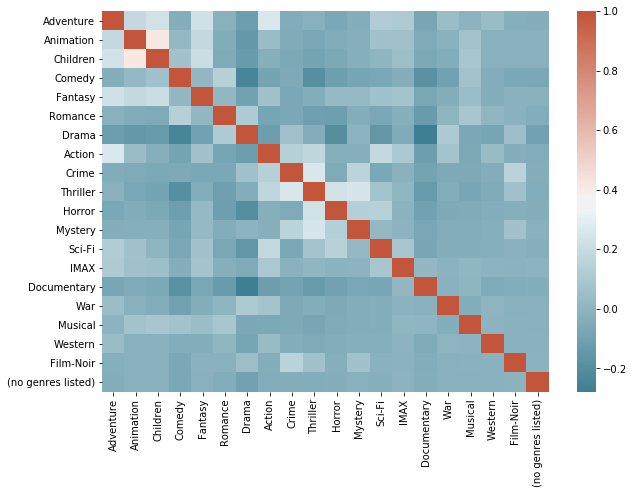

In [23]:
# Matriz de correlación
plt.subplots(figsize=(10,7))
corr = movies_genres.corr()
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, annot=False,
cmap=sns.diverging_palette(220, 20, as_cmap=True))

Ahora procedemos a visualizar la cantidad de películas por año y observamos una gran caida de númeor de películas al final de la gráfica

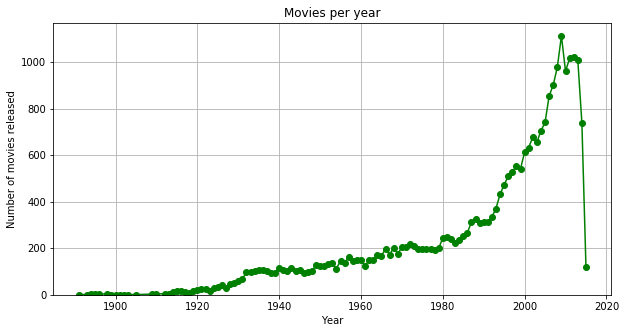

In [24]:
movies_year = movies[["movieId", "year"]].groupby("year")

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(movies_year.year.first(), movies_year.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('Movies per year')
plt.show()

Número de películas que poseen cada género

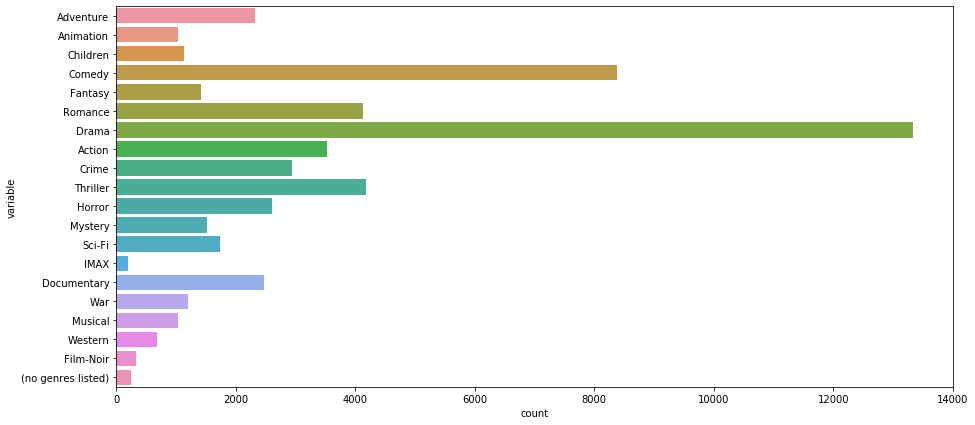

In [25]:
plt.subplots(figsize=(15,7))
df = pd.melt(movies_genres)
sns.countplot(data=df.loc[df['value']!=0], y='variable')

### **Creación de datasets**
Creamos los diferentes datasets para los diferentes tipos de algoritmos

En primer lugar se crea el dataset User_x_Rating y se guarda en un archivo csv

In [26]:
ratings.head()

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614


In [27]:
#Con una cantidad tan grande de datos no puedo utilizar bien pandas así que la reduzco drásticamente
custom_ratings = ratings.drop(columns=['timestamp']).drop_duplicates()

user_counts = custom_ratings['userId'].value_counts()
custom_ratings = custom_ratings[custom_ratings['userId'].isin(user_counts[user_counts >= 1000].index)]

rating_counts = custom_ratings['rating'].value_counts()
custom_ratings = custom_ratings[custom_ratings['rating'].isin(rating_counts[rating_counts >= 500].index)]

custom_ratings.info()
custom_ratings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811066 entries, 10168975 to 4243883
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 85.8 MB


,userId,movieId,rating
10168975,70350,1,3.0
18073064,125008,1,3.0
10175939,70391,1,5.0
10172506,70379,1,5.0
18074495,125010,1,3.5


In [28]:
len(custom_ratings.userId.unique())

1894

In [29]:
#sample = np.array_split(ratings, 3)
#ratings = ratings.fillna(0)

sample = custom_ratings.sample(frac=0.01, random_state=1).head(20)
sample = sample.sort_index()
sample

,userId,movieId,rating
529361,3576,3927,3.0
2502175,16938,51933,4.0
3944643,26885,3081,2.0
4256334,29015,1772,2.0
4564103,31244,1097,4.0
5424288,37264,77233,3.5
5695350,39181,115569,4.0
6343947,43545,48560,1.5
6811516,46851,4947,3.5
9556072,66143,527,4.0


In [30]:
true_pivot = pd.pivot_table(custom_ratings, index=["userId"], columns=["movieId"], values="rating")
#true_pivot = true_pivot.fillna(0)
true_pivot

In [42]:
ratings.loc[(ratings.userId == 116) & (ratings.movieId == 2)]

,userId,movieId,rating,timestamp
13175,116,2,2.0,1132728068


In [31]:
#true_pivot.to_csv(r'/home/marino/Desktop/ersmc/info/demoERSMC/data/user_x_ratings_movies.csv')

In [32]:
'''custom_pivot = pd.DataFrame(columns = np.sort(custom_ratings["movieId"]), index = custom_ratings["userId"]).sort_index()
#custom_pivot = custom_pivot.fillna(0)
custom_pivot'''

'custom_pivot = pd.DataFrame(columns = np.sort(custom_ratings["movieId"]), index = custom_ratings["userId"]).sort_index()\n#custom_pivot = custom_pivot.fillna(0)\ncustom_pivot'

In [33]:
'''total = len(custom_pivot.index) * len(custom_pivot.columns)
progress = 0
for i in custom_pivot.index:
    for j in custom_pivot.columns:
        value = custom_ratings.loc[(custom_ratings["userId"] == i) & (custom_ratings['movieId'] == j)].rating
        custom_pivot.loc[i][j] = 0 if value.empty else value.item()
        progress += 1
        print(f"Progress {(progress * 100)/total}% -----> {progress}/{total} ", end="\r")
custom_pivot'''

'total = len(custom_pivot.index) * len(custom_pivot.columns)\nprogress = 0\nfor i in custom_pivot.index:\n    for j in custom_pivot.columns:\n        value = custom_ratings.loc[(custom_ratings["userId"] == i) & (custom_ratings[\'movieId\'] == j)].rating\n        custom_pivot.loc[i][j] = 0 if value.empty else value.item()\n        progress += 1\n        print(f"Progress {(progress * 100)/total}% -----> {progress}/{total} ", end="\r")\ncustom_pivot'

In [34]:
#print(custom_ratings.loc[(custom_ratings["userId"] == 2502) & (custom_ratings['movieId'] == 362)])

In [35]:
'''user_ratings = pd.pivot_table(sample, index=["userId"], columns=["movieId"], values="rating")
user_ratings.head()'''

'user_ratings = pd.pivot_table(sample, index=["userId"], columns=["movieId"], values="rating")\nuser_ratings.head()'